# TP 1 - Équation de la chaleur
## $\theta$ - Shéma

On résout numériquement l'équation de la chaleur sur $\Omega:=]-L,L[$ avec conditions aux limites de Dirichlet

$$ \frac{\partial u}{\partial t}(x,t)-\frac{\partial^2 u}{\partial x^2}(x,t) = 0,\quad x \in \Omega,\quad t \gt 0,\\
u(-L,t)=u(L,t)=0,\quad t > 0,\\
u(x,0)=u_0(x),\quad x \in \Omega, $$

et le $\theta$-schéma  :

$$ \frac{u_j^{n+1}-u_j^n}{\Delta t}-\theta\frac{(u_{j+1}^n-2u_j^n+u_{j-1}^n)}{\Delta x^2}-(\theta-1)\frac{(u_{j+1}^{n+1}-2u_j^{n+1}+u_{j-1}^{n+1})}{\Delta x^2} = 0. $$ 

In [1]:
import Pkg; Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General.toml`


   Resolving package versions...


   Installed Glib_jll ───── v2.74.0+2
   Installed Libiconv_jll ─ v1.16.1+2


  No Changes to `~/.julia/environments/v1.8/Project.toml`
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [7746bdde] ↑ Glib_jll v2.74.0+1 ⇒ v2.74.0+2
  [94ce4f54] ↑ Libiconv_jll v1.16.1+1 ⇒ v1.16.1+2


Precompiling project...


  ✓ Libiconv_jll


  ✓ XML2_jll


  ✓ Wayland_jll


  ✓ XSLT_jll
  ✓ Gettext_jll


  ✓ Xorg_libxcb_jll
  ✓ Glib_jll


  ✓ Xorg_libX11_jll
  ✓ Xorg_xcb_util_jll


  ✓ Xorg_libXext_jll
  ✓ Xorg_libXrender_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_libXfixes_jll
  ✓ Xorg_xcb_util_image_jll


  ✓ Libglvnd_jll
  ✓ Xorg_libXinerama_jll
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXi_jll


  ✓ Xorg_xkeyboard_config_jll


  ✓ GLFW_jll


  ✓ xkbcommon_jll


  ✓ Qt5Base_jll
  ✓ Cairo_jll


  ✓ HarfBuzz_jll


  ✓ libass_jll


  ✓ FFMPEG_jll


  ✓ FFMPEG


  ✓ GR_jll


  ✓ GR


  ✓ Plots


  35 dependencies successfully precompiled in 32 seconds. 99 already precompiled.


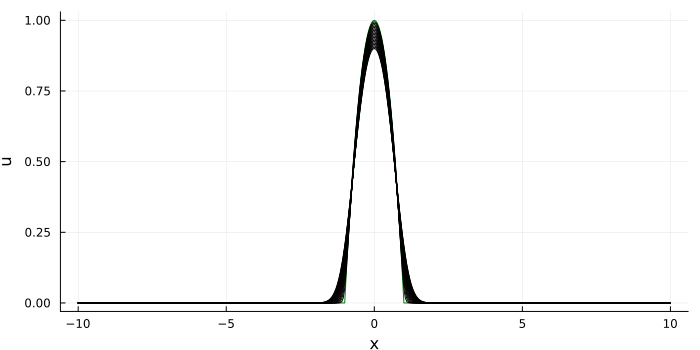

In [9]:
using LinearAlgebra, Plots

# Parameters
theta = 0.5
L = 10.0                               # domain half size
#Nx = 100                               # grid size (space)
#Nx = 200
Nx = 400
#Nx = 800

Δx = 2*L/Nx                            # step size (space)
σ = 0.1                                # CFL
Δt = σ * Δx^2                          # step size (time)
#Δt = 0.0000001
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(σ*(theta-1)*ones(Nx), 1 .+ 2*σ*(1-theta)*ones(Nx+1), (theta-1)*σ*ones(Nx))
B = Tridiagonal(σ*theta*ones(Nx), 1 .- 2*σ*theta*ones(Nx+1), σ*theta*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

# Différentes valeurs de $\sigma$

Pour $$\sigma = 0.51$$
On retrouve

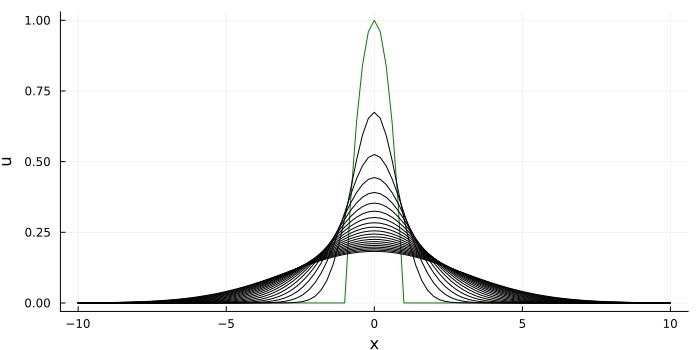

In [10]:
using LinearAlgebra, Plots

# Parameters
theta = 0.4
L = 10.0                               # domain half size
Nx = 100                               # grid size (space)
#Nx = 200
#Nx = 400
#Nx = 800

Δx = 2*L/Nx                            # step size (space)
σ = 0.51                                # CFL
Δt = σ * Δx^2                          # step size (time)
#Δt = 0.0000001
Nt = 200                               # grid size (time)
x = range(-L, L, length=Nx+1)          # grid (space)
u0 = max.(0, 1 .- x.^2)                # initial condition

# Explicit scheme
u = u0
u_plot = plot(x, u, xlabel="x", ylabel="u", color=:green, legend=false)

A = Tridiagonal(σ*(theta-1)*ones(Nx), 1 .+ 2*σ*(1-theta)*ones(Nx+1), (theta-1)*σ*ones(Nx))
B = Tridiagonal(σ*theta*ones(Nx), 1 .- 2*σ*theta*ones(Nx+1), σ*theta*ones(Nx))

for n = 1:Nt
    u = A\(B*u)
    if mod(n, Nt/20) == 0
        plot!(u_plot, x, u, xlabel="x", ylabel="u", color=:black, legend=false)
    end
end
display(plot(u_plot, size=(700, 350)))

# Etude de précision  

On refait l'étude de précision  


On fixe $\Delta = 10^-7$ et on change la valeur de Nx en (200, 400, 800, 1600) afin d'obtenir respectivement un $\Delta$x à valeurs dans (0.1, 0.05, 0.025, 0.00125)

Pour $$\theta = 0.5$$ on retrouve les mêmes valeurs que pour le schéma explicite

In [11]:
# Comparison with exact solution (computed convoluting with Gaussian kernel)
us = zeros(Nx+1)
ker = exp.( -((0:Nx)*Δx).^2 / (4*Nt*Δt) )
kmax = findall(x -> x < 1e-14, ker)
kmax = length(kmax) > 0 ? kmax[1] : error("Increase Nx")

for j = 1:(Nx+1)
    jmin = max(1, j-kmax)
    jmax = min(Nx+1, j+kmax)
    us[j] = Δx * sum( u0[jmin:jmax].*ker[1 .+ abs.(j.-(jmin:jmax))] ) / sqrt(4*π*Nt*Δt)
end

err = us-u
us_plot = plot(x, us, xlabel="x", ylabel="us", color=:red, label="Solution", lw=6)
plot!(us_plot, x, u, xlabel="x", ylabel="u", color=:black, label="Finite differences", lw=2)
err_plot = plot(x, err, xlabel="x", ylabel="us-u", legend=false)
display(plot(us_plot, err_plot, layout=(2, 1), size=(700, 700)))
println("Δx: ", Δx, "\t Δt:", Δt, "\t max error: ", maximum(abs.(err)))

ErrorException: Increase Nx

# Etude de précision pour différentes valeurs de $\theta$

Pour $$\theta = 0.1$$
On trouve le graphe ci-dessous

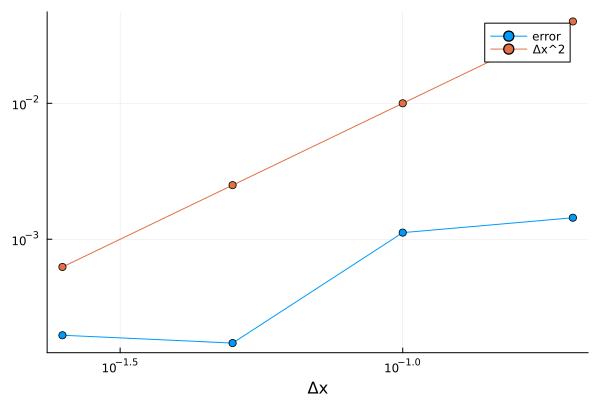

In [12]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025]
errx = [ 0.0014393497901635244,0.0011183438178192784, 0.00017221460042987635, 0.0001965947682057989]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

Pour $$\theta = 0.8$$
On trouve le graphe ci-dessous

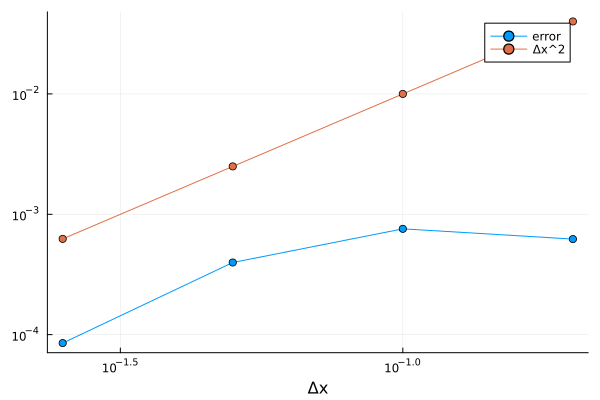

In [13]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025]
errx = [ 0.0006223097851184578,0.0007570004787216256, 0.00039766721265169225, 8.51262047872614e-5]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")

Pour $$\theta = 0.5$$
On trouve le graphe ci-dessous

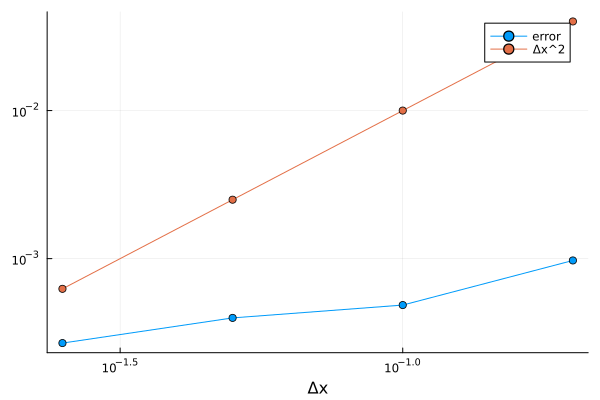

In [14]:
# Precision test
Δx = [ 0.2, 0.1, 0.05, 0.025]
errx = [0.0009716527152915377,0.00048551751468906, 0.00039766721265169225, 0.0002687730793505816]
plot(Δx, errx, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="error")
plot!(Δx, Δx.^2, xaxis=:log, yaxis=:log, marker=:dot, xlabel="Δx", label="Δx^2")